In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
import app
warnings.filterwarnings('ignore')

2022-11-27 19:28:18.361 
  command:

    streamlit run D:\Users\Valerian\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [2]:
data = pd.read_csv("heart.csv")
#data = data.append(app.row,ignore_index=True)

In [3]:
df = pd.read_csv('file.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBp,Cholesterol,FastingBS,RestingEcG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,38,Female,ATA,138,287,0,Normal,170,N,0.0,Up


In [4]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data2 = data.drop('HeartDisease',axis=1)
data2 = pd.concat([data, df], ignore_index=True, sort=False)

<AxesSubplot:>

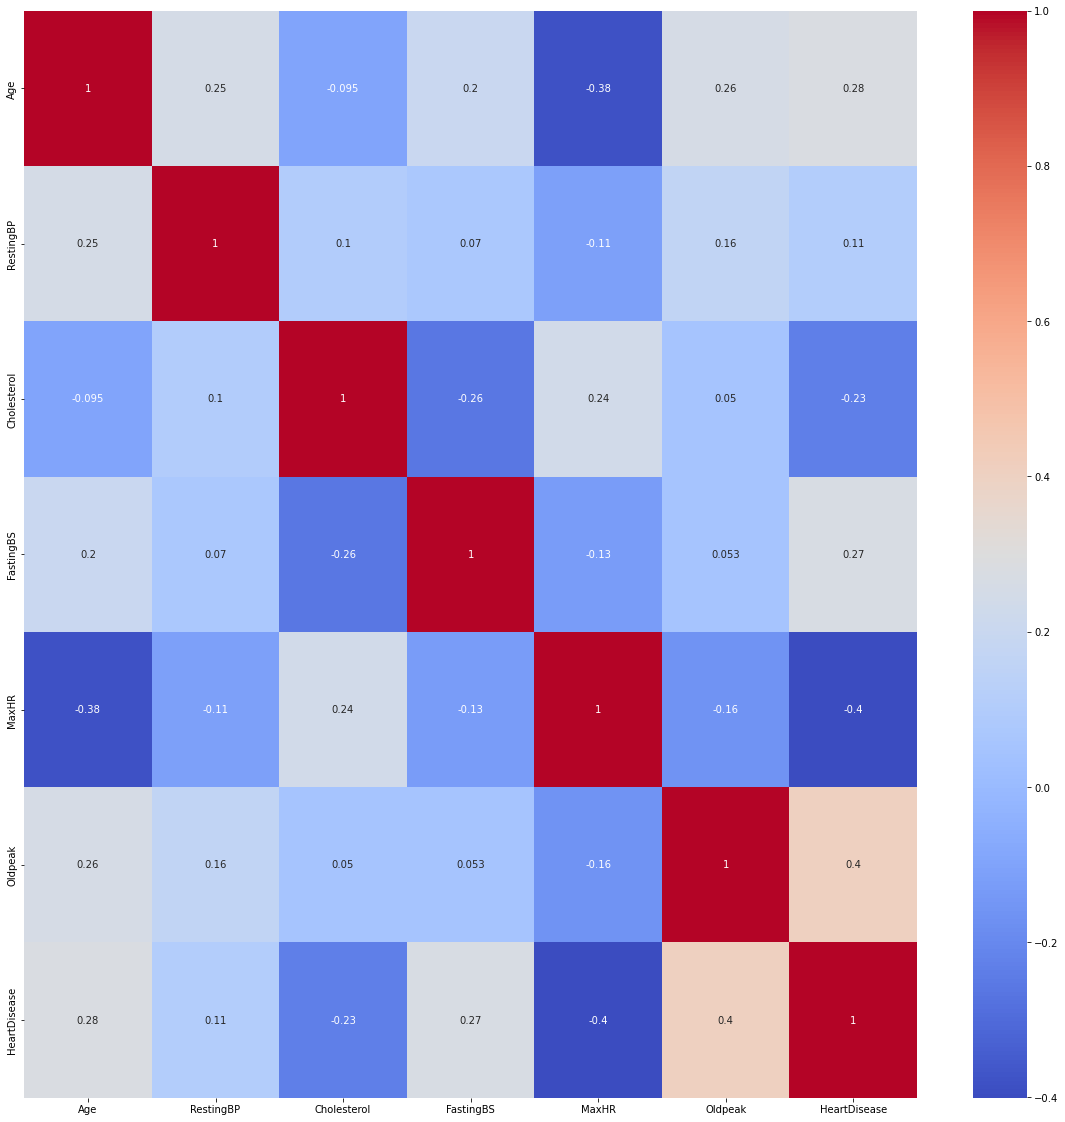

In [10]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot=True,cmap = 'coolwarm')

In [11]:
def encoding(data):
    lbl_enc=LabelEncoder()
    for column in data.select_dtypes(object):
        data[column] = lbl_enc.fit_transform(data[column])

In [12]:
encoding(data)

In [13]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [14]:
def selection(data,column):
    from kydavra import PointBiserialCorrSelector
    pointbiserial = PointBiserialCorrSelector(min_corr = 0.2)
    selectedcolumn=pointbiserial.select(data,column)
    X_select = data.loc[:,selectedcolumn]
    y_select = data.loc[:,column]
    X_select = pd.DataFrame(data = X_select,columns = X_select.columns)
    y_select = pd.DataFrame(data = y_select,columns = [column])
    return pd.concat([X_select,y_select],axis = 1)

In [15]:
selection(data,"HeartDisease").head()

,ST_Slope,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,2,172,0,0.0,0
1,1,156,0,1.0,1
2,2,98,0,0.0,0
3,1,108,1,1.5,1
4,2,122,0,0.0,0


In [16]:
def train_test_sp(data,column,type):
    from sklearn.model_selection import train_test_split
    X = data.drop(column,axis = 1)
    y = data.loc[:,column]
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state=42)
    if type == 'full':
        return X_train,X_test,y_train,y_test
    elif type == 'xtrain':
        return X_train
    elif type == 'ytrain':
        return y_train
    elif type == 'xtest':
        return X_test

In [17]:
def random_f(value1,value2):
    from sklearn.ensemble import RandomForestClassifier
    Rf_model = RandomForestClassifier(random_state=42,class_weight='balanced',)
    Rf_model.fit(value1,value2)
    return Rf_model
    

In [18]:
# from sklearn.pipeline import Pipeline
# pipe = Pipeline([('selection', selection(data,column)), ('train_test_split', train_test_sp(data,column,type)),('random_f',random_f(valu))])

In [19]:
def prediction(model,value):
    return model.predict(value)[-1]
    

In [20]:
prediction(random_f(train_test_sp(data,'HeartDisease','xtrain'),train_test_sp(data,'HeartDisease','ytrain')),train_test_sp(data,'HeartDisease','xtest'))

1